In [ ]:
# Install the tensor_flow module
!pip install tensorflow

In [ ]:
# Install the tensor_flow addons
!pip install tensorflow_addons

In [1]:
# Importing all the necessary modules to process our excel file
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from pandas import ExcelFile
from pandas import ExcelWriter
%matplotlib inline

In [2]:
%pwd

'C:\\Users\\Dr_Sam\\Desktop\\CHM SESSION JULY-NOV 2023\\WISDOM CLASS\\DATA SCIENCE-MACHINE LEARNING\\(WISDOM) Lecture 7 - Artificial Neural Networks with TensorFlow'

In [3]:
# First task is to import the raw Excel file for processing purpose
filename = 'Final_PAH_Data_Teacher_v2.xlsx'

initial_df = pd.read_excel(filename,sheet_name='Sheet1',index_col=0,skiprows=0,usecols="A:N")
initial_df

,Lf(mm),Null1,Fuel,Prim_MH_to_MC,Prim_H_to_C,Null2,Mixture,Sec_H_to_C,Sec_fuel_Percent,MC_Sec_Fuel,Total_H_to_C,PAH,GRPAH
S/No,,,,,,,,,,,,,
1,1.243198,C2H4,28,0.166667,2.0,0% CH4,16,4,0.00,0.0,2.00,696.493698,412.717406
2,1.759619,C2H4,28,0.166667,2.0,0% CH4,16,4,0.00,0.0,2.00,930.999998,495.480126
3,2.240685,C2H4,28,0.166667,2.0,0% CH4,16,4,0.00,0.0,2.00,1187.902926,572.576728
4,2.757107,C2H4,28,0.166667,2.0,0% CH4,16,4,0.00,0.0,2.00,1504.963994,655.339447
5,3.238173,C2H4,28,0.166667,2.0,0% CH4,16,4,0.00,0.0,2.00,1838.769810,732.436049
...,...,...,...,...,...,...,...,...,...,...,...,...,...
654,5.763478,CH4,16,0.333333,4.0,7% H2,2,10000,0.07,0.0,4.14,13.355160,6.625981
655,6.275610,CH4,16,0.333333,4.0,7% H2,2,10000,0.07,0.0,4.14,17.107886,8.029326
656,6.752386,CH4,16,0.333333,4.0,7% H2,2,10000,0.07,0.0,4.14,21.247527,9.335789


In [4]:
initial_df.columns

Index(['Lf(mm)', 'Null1', 'Fuel', 'Prim_MH_to_MC', 'Prim_H_to_C', 'Null2',
       'Mixture', 'Sec_H_to_C', 'Sec_fuel_Percent', 'MC_Sec_Fuel',
       'Total_H_to_C', 'PAH', 'GRPAH'],
      dtype='object')

In [5]:
needed_df = initial_df[['Lf(mm)', 'Fuel', 'Prim_MH_to_MC',
       'Mixture', 'Sec_fuel_Percent', 'MC_Sec_Fuel',
       'Total_H_to_C', 'PAH']]
needed_df

,Lf(mm),Fuel,Prim_MH_to_MC,Mixture,Sec_fuel_Percent,MC_Sec_Fuel,Total_H_to_C,PAH
S/No,,,,,,,,
1,1.243198,28,0.166667,16,0.00,0.0,2.00,696.493698
2,1.759619,28,0.166667,16,0.00,0.0,2.00,930.999998
3,2.240685,28,0.166667,16,0.00,0.0,2.00,1187.902926
4,2.757107,28,0.166667,16,0.00,0.0,2.00,1504.963994
5,3.238173,28,0.166667,16,0.00,0.0,2.00,1838.769810
...,...,...,...,...,...,...,...,...
654,5.763478,16,0.333333,2,0.07,0.0,4.14,13.355160
655,6.275610,16,0.333333,2,0.07,0.0,4.14,17.107886
656,6.752386,16,0.333333,2,0.07,0.0,4.14,21.247527


In [6]:

# Printing out the Entire Raw Excel Data for confirmation
needed_df = pd.DataFrame(needed_df)
#df = df.apply(pd.to_numeric, errors='coerce')
needed_df = needed_df.fillna(0)

#df.at[0:12,7:11] = np.round(df.loc[0:12,7:11],3)
needed_df

,Lf(mm),Fuel,Prim_MH_to_MC,Mixture,Sec_fuel_Percent,MC_Sec_Fuel,Total_H_to_C,PAH
S/No,,,,,,,,
1,1.243198,28,0.166667,16,0.00,0.0,2.00,696.493698
2,1.759619,28,0.166667,16,0.00,0.0,2.00,930.999998
3,2.240685,28,0.166667,16,0.00,0.0,2.00,1187.902926
4,2.757107,28,0.166667,16,0.00,0.0,2.00,1504.963994
5,3.238173,28,0.166667,16,0.00,0.0,2.00,1838.769810
...,...,...,...,...,...,...,...,...
654,5.763478,16,0.333333,2,0.07,0.0,4.14,13.355160
655,6.275610,16,0.333333,2,0.07,0.0,4.14,17.107886
656,6.752386,16,0.333333,2,0.07,0.0,4.14,21.247527


In [7]:
# Descriptions
needed_df["PAH"].describe()

count      658.000000
mean      5144.381616
std      10726.740271
min          0.578278
25%        140.442594
50%        603.990562
75%       3652.125250
max      68329.872942
Name: PAH, dtype: float64

In [8]:
# To find the correlation among
# the columns using pearson method
needed_df.corr(method ='pearson')

,Lf(mm),Fuel,Prim_MH_to_MC,Mixture,Sec_fuel_Percent,MC_Sec_Fuel,Total_H_to_C,PAH
Lf(mm),1.000000,-0.035710,0.113368,-0.174055,-0.096892,-0.138855,0.103584,0.264378
Fuel,-0.035710,1.000000,-0.430037,0.133413,0.116498,0.024778,-0.461671,0.343496
Prim_MH_to_MC,0.113368,-0.430037,1.000000,-0.104386,-0.127573,-0.051028,0.898047,-0.385709
Mixture,-0.174055,0.133413,-0.104386,1.000000,0.499640,0.779961,0.023220,-0.022269
Sec_fuel_Percent,-0.096892,0.116498,-0.127573,0.499640,1.000000,0.850336,0.261963,-0.200219
MC_Sec_Fuel,-0.138855,0.024778,-0.051028,0.779961,0.850336,1.000000,0.242672,-0.142470
Total_H_to_C,0.103584,-0.461671,0.898047,0.023220,0.261963,0.242672,1.000000,-0.472044
PAH,0.264378,0.343496,-0.385709,-0.022269,-0.200219,-0.142470,-0.472044,1.000000


In [9]:
# To find the correlation among
# the columns using pearson method
needed_df.corr(method ='kendall')

,Lf(mm),Fuel,Prim_MH_to_MC,Mixture,Sec_fuel_Percent,MC_Sec_Fuel,Total_H_to_C,PAH
Lf(mm),1.000000,-0.010366,0.057356,-0.148563,-0.070301,-0.111600,0.048682,0.190641
Fuel,-0.010366,1.000000,0.005870,0.121702,0.097445,0.033828,-0.065166,0.158192
Prim_MH_to_MC,0.057356,0.005870,1.000000,-0.008658,-0.028065,0.031179,0.744604,-0.639414
Mixture,-0.148563,0.121702,-0.008658,1.000000,0.415504,0.733017,0.093108,0.039856
Sec_fuel_Percent,-0.070301,0.097445,-0.028065,0.415504,1.000000,0.752971,0.335109,-0.091749
MC_Sec_Fuel,-0.111600,0.033828,0.031179,0.733017,0.752971,1.000000,0.282725,-0.070198
Total_H_to_C,0.048682,-0.065166,0.744604,0.093108,0.335109,0.282725,1.000000,-0.636654
PAH,0.190641,0.158192,-0.639414,0.039856,-0.091749,-0.070198,-0.636654,1.000000


In [10]:
needed_df.columns

Index(['Lf(mm)', 'Fuel', 'Prim_MH_to_MC', 'Mixture', 'Sec_fuel_Percent',
       'MC_Sec_Fuel', 'Total_H_to_C', 'PAH'],
      dtype='object')

In [11]:
data_df = needed_df.copy()

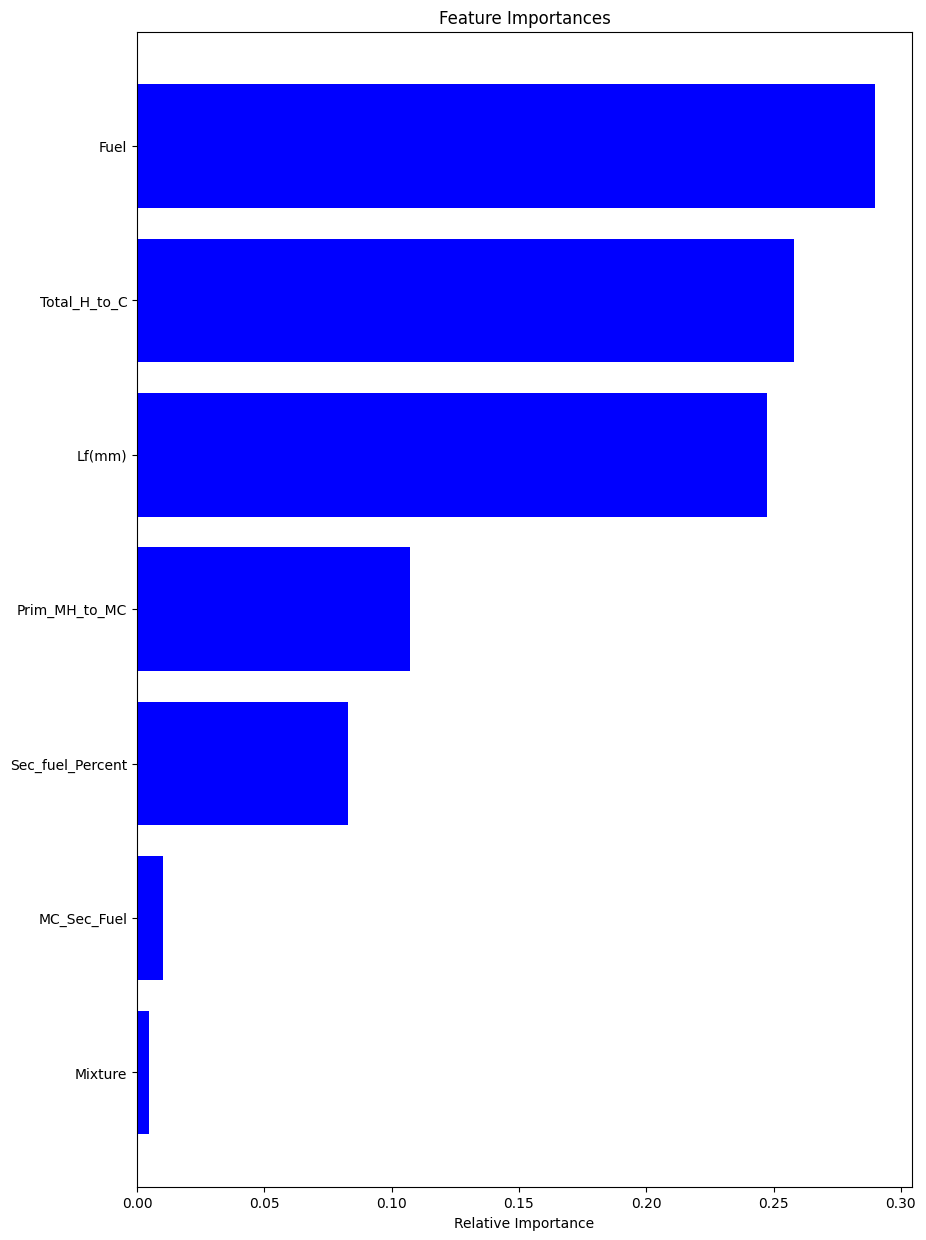

In [12]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor,ExtraTreesRegressor
from sklearn.model_selection import train_test_split
# Spliiting data into test and train sets
X_train, X_test, y_train, y_test = train_test_split(data_df.drop('PAH', axis=1), data_df['PAH'], test_size=0.20, random_state=0)
# fitting the model
model = ExtraTreesRegressor(n_estimators=500, n_jobs=-1, random_state=42)
model.fit(X_train, y_train)
# plotting feature importances
features = data_df.drop('PAH', axis = 1).columns
importances = model.feature_importances_
indices = np.argsort(importances)
plt.figure(figsize=(10,15))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

In [13]:
import tensorflow as tf
from tensorflow.keras import models,layers

In [14]:
from tensorflow_addons.metrics import RSquare

C:\Users\Dr_Sam\AppData\Local\Programs\Python\Python311\Lib\site-packages\tensorflow_addons\utils\tfa_eol_msg.py:23: UserWarning: 

TensorFlow Addons (TFA) has ended development and introduction of new features.
TFA has entered a minimal maintenance and release mode until a planned end of life in May 2024.
Please modify downstream libraries to take dependencies from other repositories in our TensorFlow community (e.g. Keras, Keras-CV, and Keras-NLP). 

For more information see: https://github.com/tensorflow/addons/issues/2807 

  warnings.warn(


In [15]:
needed_df.shape

(658, 8)

In [16]:
needed_df.columns

Index(['Lf(mm)', 'Fuel', 'Prim_MH_to_MC', 'Mixture', 'Sec_fuel_Percent',
       'MC_Sec_Fuel', 'Total_H_to_C', 'PAH'],
      dtype='object')

In [17]:
needed_df

,Lf(mm),Fuel,Prim_MH_to_MC,Mixture,Sec_fuel_Percent,MC_Sec_Fuel,Total_H_to_C,PAH
S/No,,,,,,,,
1,1.243198,28,0.166667,16,0.00,0.0,2.00,696.493698
2,1.759619,28,0.166667,16,0.00,0.0,2.00,930.999998
3,2.240685,28,0.166667,16,0.00,0.0,2.00,1187.902926
4,2.757107,28,0.166667,16,0.00,0.0,2.00,1504.963994
5,3.238173,28,0.166667,16,0.00,0.0,2.00,1838.769810
...,...,...,...,...,...,...,...,...
654,5.763478,16,0.333333,2,0.07,0.0,4.14,13.355160
655,6.275610,16,0.333333,2,0.07,0.0,4.14,17.107886
656,6.752386,16,0.333333,2,0.07,0.0,4.14,21.247527


In [18]:
data_df = needed_df.copy()
data_df[['Fuel', 'Mixture','Total_H_to_C']] = np.log10(data_df[['Fuel', 'Mixture','Total_H_to_C']])
data_dfX = (data_df[['Lf(mm)', 'Fuel', 'Prim_MH_to_MC', 'Mixture', 'Sec_fuel_Percent','Total_H_to_C']])

In [19]:
data_df['PAH'] = np.log10(data_df['PAH'])/10

In [ ]:
data_dfX

In [ ]:
# First Attempt to build an Artificial Neural Network

In [20]:
def build_nn():
    network = models.Sequential()
    network.add(layers.Dense(7, activation='relu',
                           input_shape=(X_train.shape[1],)))
    network.add(layers.Dense(14, activation='relu'))
    network.add(layers.Dense(1))
    network.compile(optimizer='rmsprop', loss='mse', metrics=['mae']) # MSE Loss & MAE Loss - Regression task
    return network

In [21]:
needed_df.columns

Index(['Lf(mm)', 'Fuel', 'Prim_MH_to_MC', 'Mixture', 'Sec_fuel_Percent',
       'MC_Sec_Fuel', 'Total_H_to_C', 'PAH'],
      dtype='object')

In [22]:
# Deriving the model equation

X_features = data_dfX.copy()
y_values = data_df['PAH'].copy()

In [23]:
train_X = X_features[0:441]
train_y = y_values[0:441]

In [24]:
train_X

,Lf(mm),Fuel,Prim_MH_to_MC,Mixture,Sec_fuel_Percent,Total_H_to_C
S/No,,,,,,
1,1.243198,1.447158,0.166667,1.20412,0.0,0.301030
2,1.759619,1.447158,0.166667,1.20412,0.0,0.301030
3,2.240685,1.447158,0.166667,1.20412,0.0,0.301030
4,2.757107,1.447158,0.166667,1.20412,0.0,0.301030
5,3.238173,1.447158,0.166667,1.20412,0.0,0.301030
...,...,...,...,...,...,...
437,4.239949,1.477121,0.250000,1.20412,0.6,0.535113
438,4.756371,1.477121,0.250000,1.20412,0.6,0.535113
439,5.247792,1.477121,0.250000,1.20412,0.6,0.535113


In [25]:
train_y

S/No
1      0.284292
2      0.296895
3      0.307478
4      0.317753
5      0.326453
         ...   
437    0.241262
438    0.251631
439    0.260499
440    0.269120
441    0.276472
Name: PAH, Length: 441, dtype: float64

In [65]:
train_y.nunique()

427

In [ ]:
# Second Attempt to build an Artificial Neural Network

In [26]:
# model = build_nn()
model = tf.keras.Sequential()
model.add(tf.keras.Input(shape=(6)))
model.add(tf.keras.layers.Dense(49, activation='softplus'))
model.add(tf.keras.layers.Dense(1000))
# model.weights not created yet
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-2),loss='mse',
              metrics=['mae'])

model.fit(train_X,train_y,batch_size=6, epochs=20)

Epoch 1/20
74/74 [==============================] - 3s 5ms/step - loss: 0.0169 - mae: 0.0962
Epoch 2/20
74/74 [==============================] - 0s 5ms/step - loss: 0.0077 - mae: 0.0684
Epoch 3/20
74/74 [==============================] - 0s 5ms/step - loss: 0.0059 - mae: 0.0609
Epoch 4/20
74/74 [==============================] - 0s 5ms/step - loss: 0.0047 - mae: 0.0543
Epoch 5/20
74/74 [==============================] - 0s 6ms/step - loss: 0.0034 - mae: 0.0463
Epoch 6/20
74/74 [==============================] - 0s 5ms/step - loss: 0.0022 - mae: 0.0377
Epoch 7/20
74/74 [==============================] - 0s 5ms/step - loss: 0.0019 - mae: 0.0355
Epoch 8/20
74/74 [==============================] - 0s 5ms/step - loss: 0.0018 - mae: 0.0342
Epoch 9/20
74/74 [==============================] - 0s 5ms/step - loss: 0.0019 - mae: 0.0360
Epoch 10/20
74/74 [==============================] - 0s 6ms/step - loss: 0.0024 - mae: 0.0388
Epoch 11/20
74/74 [==============================] - 0s 5ms/step - lo

In [27]:
train_X.shape

(441, 6)

In [ ]:
# Third Attempt to build an Artificial Neural Network

In [28]:
# Test
# model = build_nn()
callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=350, baseline=0.00005, mode='min', restore_best_weights=True)
# This callback will stop the training when there is no improvement in
# the loss for three consecutive epochs.
model = tf.keras.Sequential()
# model.add(tf.keras.Input(shape=(7,)))
model.add(tf.keras.layers.Dense(6))
#model.add(tf.keras.layers.Dense(36, activation='softplus'))
model.add(tf.keras.layers.Dense(72, activation='relu'))
model.add(tf.keras.layers.Dense(36, activation='softmax'))
model.add(tf.keras.layers.Dense(500))
# model.weights not created yet
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-2),loss='mse',
              metrics=['mae'])

history = model.fit(train_X,train_y,batch_size=12, epochs=500,callbacks=[callback], verbose=1)

Epoch 1/500
37/37 [==============================] - 4s 6ms/step - loss: 0.0224 - mae: 0.1180
Epoch 2/500
37/37 [==============================] - 0s 7ms/step - loss: 0.0100 - mae: 0.0806
Epoch 3/500
37/37 [==============================] - 0s 6ms/step - loss: 0.0092 - mae: 0.0759
Epoch 4/500
37/37 [==============================] - 0s 5ms/step - loss: 0.0046 - mae: 0.0543
Epoch 5/500
37/37 [==============================] - 0s 6ms/step - loss: 0.0037 - mae: 0.0506
Epoch 6/500
37/37 [==============================] - 0s 4ms/step - loss: 0.0032 - mae: 0.0459
Epoch 7/500
37/37 [==============================] - 0s 5ms/step - loss: 0.0031 - mae: 0.0467
Epoch 8/500
37/37 [==============================] - 0s 6ms/step - loss: 0.0023 - mae: 0.0402
Epoch 9/500
37/37 [==============================] - 0s 5ms/step - loss: 0.0021 - mae: 0.0387
Epoch 10/500
37/37 [==============================] - 0s 7ms/step - loss: 0.0017 - mae: 0.0344
Epoch 11/500
37/37 [==============================] - 0s 6m

37/37 [==============================] - 0s 7ms/step - loss: 2.3987e-04 - mae: 0.0100
Epoch 167/500
37/37 [==============================] - 0s 6ms/step - loss: 3.1046e-04 - mae: 0.0132
Epoch 168/500
37/37 [==============================] - 0s 6ms/step - loss: 1.9644e-04 - mae: 0.0096
Epoch 169/500
37/37 [==============================] - 0s 5ms/step - loss: 7.0234e-05 - mae: 0.0064
Epoch 170/500
37/37 [==============================] - 0s 4ms/step - loss: 5.1366e-05 - mae: 0.0052
Epoch 171/500
37/37 [==============================] - 0s 7ms/step - loss: 3.8493e-04 - mae: 0.0144
Epoch 172/500
37/37 [==============================] - 0s 7ms/step - loss: 2.7567e-04 - mae: 0.0121
Epoch 173/500
37/37 [==============================] - 0s 4ms/step - loss: 1.4323e-04 - mae: 0.0094
Epoch 174/500
37/37 [==============================] - 0s 5ms/step - loss: 1.0877e-04 - mae: 0.0080
Epoch 175/500
37/37 [==============================] - 0s 5ms/step - loss: 5.9989e-05 - mae: 0.0059
Epoch 176/500


37/37 [==============================] - 0s 5ms/step - loss: 4.6857e-05 - mae: 0.0050
Epoch 249/500
37/37 [==============================] - 0s 4ms/step - loss: 3.4719e-05 - mae: 0.0043
Epoch 250/500
37/37 [==============================] - 0s 4ms/step - loss: 6.7153e-05 - mae: 0.0063
Epoch 251/500
37/37 [==============================] - 0s 6ms/step - loss: 8.1277e-05 - mae: 0.0069
Epoch 252/500
37/37 [==============================] - 0s 5ms/step - loss: 4.2211e-05 - mae: 0.0049
Epoch 253/500
37/37 [==============================] - 0s 4ms/step - loss: 1.8476e-05 - mae: 0.0032
Epoch 254/500
37/37 [==============================] - 0s 5ms/step - loss: 2.7930e-05 - mae: 0.0039
Epoch 255/500
37/37 [==============================] - 0s 5ms/step - loss: 1.5473e-04 - mae: 0.0094
Epoch 256/500
37/37 [==============================] - 0s 4ms/step - loss: 8.7227e-05 - mae: 0.0072
Epoch 257/500
37/37 [==============================] - 0s 6ms/step - loss: 5.1365e-05 - mae: 0.0052
Epoch 258/500


37/37 [==============================] - 0s 4ms/step - loss: 4.7522e-05 - mae: 0.0051
Epoch 413/500
37/37 [==============================] - 0s 4ms/step - loss: 5.2637e-05 - mae: 0.0056
Epoch 414/500
37/37 [==============================] - 0s 5ms/step - loss: 7.7771e-05 - mae: 0.0063
Epoch 415/500
37/37 [==============================] - 0s 6ms/step - loss: 7.9240e-05 - mae: 0.0070
Epoch 416/500
37/37 [==============================] - 0s 5ms/step - loss: 9.2543e-05 - mae: 0.0070
Epoch 417/500
37/37 [==============================] - 0s 5ms/step - loss: 1.1537e-04 - mae: 0.0082
Epoch 418/500
37/37 [==============================] - 0s 5ms/step - loss: 6.1619e-05 - mae: 0.0058
Epoch 419/500
37/37 [==============================] - 0s 5ms/step - loss: 2.2413e-05 - mae: 0.0034
Epoch 420/500
37/37 [==============================] - 0s 6ms/step - loss: 5.2663e-05 - mae: 0.0051
Epoch 421/500
37/37 [==============================] - 0s 7ms/step - loss: 3.0874e-05 - mae: 0.0043
Epoch 422/500


In [29]:
# Final Attempt to build an Artificial Neural Network

In [30]:
from sklearn.metrics import r2_score

In [31]:
import os
# model = build_nn()
model = tf.keras.Sequential()
# model.add(tf.keras.Input(shape=(7,)))
model.add(tf.keras.layers.Dense(6))
model.add(tf.keras.layers.Dense(36, activation='relu'))
model.add(tf.keras.layers.Dense(72, activation='softmax'))
model.add(tf.keras.layers.Dense(36, activation='leaky_relu'))
model.add(tf.keras.layers.Dense(500))
# model.weights not created yet
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-2),loss='mse',
              metrics=['mae'])
EPOCHS = 500
checkpoint_path='best_weights.hdf5'
callback = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path, monitor='loss', mode='min', save_best_only=True,save_weights_only=True)
# This callback will stop the training when there is no improvement in
# the loss for three consecutive epochs.

history = model.fit(train_X,train_y,batch_size=36, epochs=EPOCHS,callbacks=[callback], verbose=1)
model.load_weights(checkpoint_path)

Epoch 1/500
13/13 [==============================] - 4s 10ms/step - loss: 0.0406 - mae: 0.1683
Epoch 2/500
13/13 [==============================] - 0s 10ms/step - loss: 0.0114 - mae: 0.0850
Epoch 3/500
13/13 [==============================] - 0s 10ms/step - loss: 0.0101 - mae: 0.0809
Epoch 4/500
13/13 [==============================] - 0s 9ms/step - loss: 0.0099 - mae: 0.0795
Epoch 5/500
13/13 [==============================] - 0s 10ms/step - loss: 0.0098 - mae: 0.0781
Epoch 6/500
13/13 [==============================] - 0s 9ms/step - loss: 0.0093 - mae: 0.0758
Epoch 7/500
13/13 [==============================] - 0s 8ms/step - loss: 0.0089 - mae: 0.0740
Epoch 8/500
13/13 [==============================] - 0s 10ms/step - loss: 0.0075 - mae: 0.0686
Epoch 9/500
13/13 [==============================] - 0s 10ms/step - loss: 0.0050 - mae: 0.0560
Epoch 10/500
13/13 [==============================] - 0s 9ms/step - loss: 0.0037 - mae: 0.0507
Epoch 11/500
13/13 [==============================] -

13/13 [==============================] - 0s 14ms/step - loss: 1.2722e-04 - mae: 0.0084
Epoch 168/500
13/13 [==============================] - 0s 8ms/step - loss: 1.9514e-04 - mae: 0.0105
Epoch 169/500
13/13 [==============================] - 0s 9ms/step - loss: 1.4452e-04 - mae: 0.0090
Epoch 170/500
13/13 [==============================] - 0s 10ms/step - loss: 2.8362e-04 - mae: 0.0132
Epoch 171/500
13/13 [==============================] - 0s 10ms/step - loss: 1.0445e-04 - mae: 0.0075
Epoch 172/500
13/13 [==============================] - 0s 8ms/step - loss: 1.0919e-04 - mae: 0.0077
Epoch 173/500
13/13 [==============================] - 0s 9ms/step - loss: 1.0739e-04 - mae: 0.0075
Epoch 174/500
13/13 [==============================] - 0s 12ms/step - loss: 9.9874e-05 - mae: 0.0074
Epoch 175/500
13/13 [==============================] - 0s 5ms/step - loss: 1.8862e-04 - mae: 0.0103
Epoch 176/500
13/13 [==============================] - 0s 6ms/step - loss: 1.5465e-04 - mae: 0.0098
Epoch 177/

13/13 [==============================] - 0s 6ms/step - loss: 7.8267e-05 - mae: 0.0072
Epoch 331/500
13/13 [==============================] - 0s 5ms/step - loss: 8.1737e-05 - mae: 0.0070
Epoch 332/500
13/13 [==============================] - 0s 7ms/step - loss: 2.8686e-05 - mae: 0.0041
Epoch 333/500
13/13 [==============================] - 0s 5ms/step - loss: 1.7078e-05 - mae: 0.0031
Epoch 334/500
13/13 [==============================] - 0s 6ms/step - loss: 1.6157e-05 - mae: 0.0031
Epoch 335/500
13/13 [==============================] - 0s 6ms/step - loss: 2.1057e-05 - mae: 0.0037
Epoch 336/500
13/13 [==============================] - 0s 6ms/step - loss: 1.7386e-05 - mae: 0.0032
Epoch 337/500
13/13 [==============================] - 0s 5ms/step - loss: 1.6110e-05 - mae: 0.0031
Epoch 338/500
13/13 [==============================] - 0s 7ms/step - loss: 1.1935e-05 - mae: 0.0026
Epoch 339/500
13/13 [==============================] - 0s 7ms/step - loss: 1.3766e-05 - mae: 0.0028
Epoch 340/500


13/13 [==============================] - 0s 7ms/step - loss: 9.0338e-06 - mae: 0.0023
Epoch 413/500
13/13 [==============================] - 0s 8ms/step - loss: 8.5858e-06 - mae: 0.0022
Epoch 414/500
13/13 [==============================] - 0s 5ms/step - loss: 1.3887e-05 - mae: 0.0029
Epoch 415/500
13/13 [==============================] - 0s 5ms/step - loss: 1.0896e-05 - mae: 0.0025
Epoch 416/500
13/13 [==============================] - 0s 6ms/step - loss: 1.5412e-05 - mae: 0.0029
Epoch 417/500
13/13 [==============================] - 0s 6ms/step - loss: 1.7263e-05 - mae: 0.0033
Epoch 418/500
13/13 [==============================] - 0s 5ms/step - loss: 1.3157e-05 - mae: 0.0029
Epoch 419/500
13/13 [==============================] - 0s 5ms/step - loss: 9.4599e-06 - mae: 0.0023
Epoch 420/500
13/13 [==============================] - 0s 7ms/step - loss: 9.4767e-06 - mae: 0.0024
Epoch 421/500
13/13 [==============================] - 0s 5ms/step - loss: 9.4527e-06 - mae: 0.0023
Epoch 422/500


13/13 [==============================] - 0s 6ms/step - loss: 2.0523e-05 - mae: 0.0034
Epoch 495/500
13/13 [==============================] - 0s 5ms/step - loss: 1.9571e-05 - mae: 0.0033
Epoch 496/500
13/13 [==============================] - 0s 6ms/step - loss: 1.6582e-05 - mae: 0.0030
Epoch 497/500
13/13 [==============================] - 0s 4ms/step - loss: 1.7407e-05 - mae: 0.0033
Epoch 498/500
13/13 [==============================] - 0s 4ms/step - loss: 1.7266e-05 - mae: 0.0032
Epoch 499/500
13/13 [==============================] - 0s 6ms/step - loss: 1.1893e-05 - mae: 0.0026
Epoch 500/500
13/13 [==============================] - 0s 6ms/step - loss: 1.0600e-05 - mae: 0.0023


In [32]:
print(history.history['loss'].index(min(history.history['loss'])),min(history.history['loss']))  # Only 4 epochs are run

426 6.5441754486528225e-06


In [33]:
test_X = X_features[441:658]
test_y = y_values[441:658]
test_X.shape

(217, 6)

In [34]:
train_mse_score, train_mae_score = model.evaluate(train_X,train_y,batch_size=12)

37/37 [==============================] - 1s 5ms/step - loss: 9.2753e-06 - mae: 0.0024


In [ ]:
from sklearn.metrics import r2_score

In [35]:
# Evaluating the train predictions for small data
y_train_predict = model.predict(train_X)
y_train_predict[:20,0] # just extract 20 records

14/14 [==============================] - 0s 3ms/step


array([0.28374892, 0.29835957, 0.3102732 , 0.32117623, 0.3294544 ,
       0.33771104, 0.34491563, 0.35213128, 0.35892728, 0.36494815,
       0.370677  , 0.37590626, 0.3810008 , 0.38716298, 0.39941353,
       0.41299725, 0.42254937, 0.43102553, 0.43914947, 0.4462378 ],
      dtype=float32)

In [36]:
# Evaluating the train score for small data
train_score = r2_score(train_y, y_train_predict[:,0])
train_score

0.9990228030804384

In [37]:
test_mse_score, test_mae_score = model.evaluate(test_X, test_y,callbacks=[callback],batch_size=6)

37/37 [==============================] - 0s 5ms/step - loss: 8.9561e-05 - mae: 0.0061


In [38]:
# Evaluating the test predictions for small data
y_predict = model.predict(test_X)
y_predict[:20,0] #just extract 20 records

7/7 [==============================] - 0s 3ms/step


array([0.28589332, 0.29742947, 0.30779958, 0.31635594, 0.32577074,
       0.3345139 , 0.3421718 , 0.34936538, 0.35583442, 0.3619717 ,
       0.3680132 , 0.3735054 , 0.37862417, 0.38317955, 0.38208035,
       0.3943953 , 0.40636885, 0.41765916, 0.42475566, 0.43270788],
      dtype=float32)

In [39]:
# Evaluating the test score (for small data)
test_score = r2_score(test_y, y_predict[:,0])
test_score

0.9911115573251585

In [40]:
y_predict[:,0].shape

(217,)

In [41]:
test_y.shape

(217,)

In [42]:
import warnings
warnings.filterwarnings('ignore')

In [43]:
test_X['PAH'] = test_y
test_X['Pred_PAH'] = y_predict[:,0]
test_X

,Lf(mm),Fuel,Prim_MH_to_MC,Mixture,Sec_fuel_Percent,Total_H_to_C,PAH,Pred_PAH
S/No,,,,,,,,
442,1.243198,1.447158,0.166667,0.30103,0.00,0.30103,0.281663,0.285893
443,1.759619,1.447158,0.166667,0.30103,0.00,0.30103,0.294652,0.297429
444,2.265685,1.447158,0.166667,0.30103,0.00,0.30103,0.305896,0.307800
445,2.746751,1.447158,0.166667,0.30103,0.00,0.30103,0.315473,0.316356
446,3.263173,1.447158,0.166667,0.30103,0.00,0.30103,0.324760,0.325771
...,...,...,...,...,...,...,...,...
654,5.763478,1.204120,0.333333,0.30103,0.07,0.61700,0.112565,0.113024
655,6.275610,1.204120,0.333333,0.30103,0.07,0.61700,0.123320,0.122488
656,6.752386,1.204120,0.333333,0.30103,0.07,0.61700,0.132731,0.132389


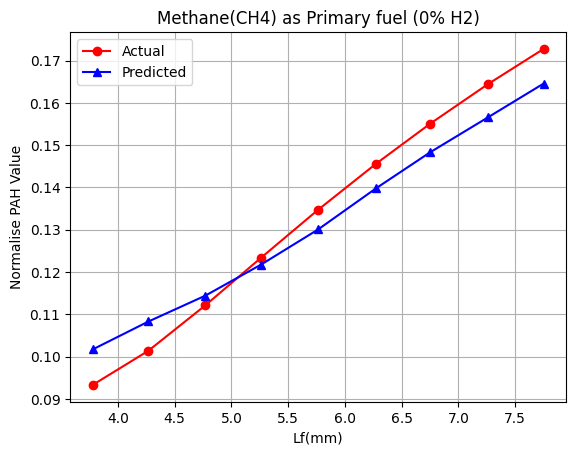

In [44]:
# Plotting Graphs for Methane(CH4) as Primary fuel (0% H2)
axes = plt.axes()
x = test_X['Lf(mm)'][199:208]
y_actual = test_X['PAH'][199:208]
y_pred = test_X['Pred_PAH'][199:208]

axes.set_title('Methane(CH4) as Primary fuel (0% H2)')
axes.set_ylabel('Normalise PAH Value')
axes.set_xlabel('Lf(mm)')
axes.set_xticks([3,3.5,4,4.5,5,5.5,6,6.5,7,7.5,8])
plt.plot(x,y_actual,'o-', color = 'red', label='Actual')
plt.plot(x,y_pred, '^-', color = 'blue', label='Predicted')
plt.legend(loc='best')
plt.grid()


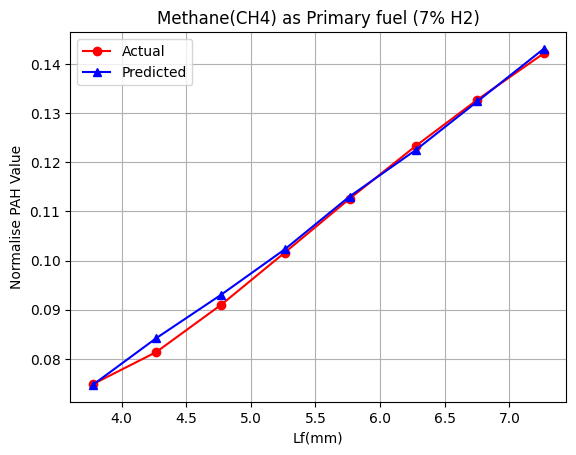

In [45]:
# Plotting Graphs for Methane(CH4) as Primary fuel (7% H2)
axes = plt.axes()
x = test_X['Lf(mm)'][208:216]
y_actual = test_X['PAH'][208:216]
y_pred = test_X['Pred_PAH'][208:216]

axes.set_title('Methane(CH4) as Primary fuel (7% H2)')
axes.set_ylabel('Normalise PAH Value')
axes.set_xlabel('Lf(mm)')
axes.set_xticks([3,3.5,4,4.5,5,5.5,6,6.5,7,7.5,8])
plt.plot(x,y_actual,'o-', color = 'red', label='Actual')
plt.plot(x,y_pred, '^-', color = 'blue', label='Predicted')
plt.legend(loc='best')
plt.grid()


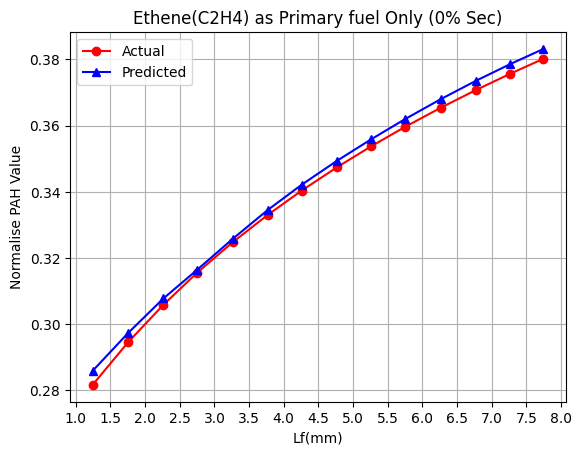

In [46]:
# Plotting Graphs for Ethene(C2H4) as Primary fuel Only (0% Sec)
axes = plt.axes()
x = test_X['Lf(mm)'][0:14]
y_actual = test_X['PAH'][0:14]
y_pred = test_X['Pred_PAH'][0:14]

axes.set_title('Ethene(C2H4) as Primary fuel Only (0% Sec)')
axes.set_ylabel('Normalise PAH Value')
axes.set_xlabel('Lf(mm)')
axes.set_xticks([1,1.5,2,2.5,3,3.5,4,4.5,5,5.5,6,6.5,7,7.5,8])
plt.plot(x,y_actual,'o-', color = 'red', label='Actual')
plt.plot(x,y_pred, '^-', color = 'blue', label='Predicted')
plt.legend(loc='best')
plt.grid()

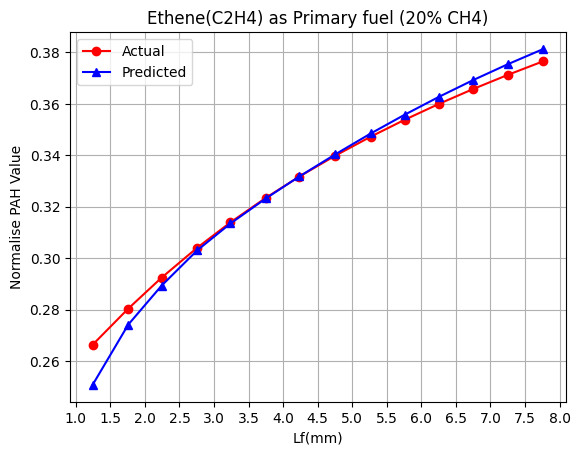

In [47]:
# Plotting Graphs for Ethene(C2H4) as Primary fuel (20% CH4)
axes = plt.axes()
x = test_X['Lf(mm)'][28:42]
y_actual = test_X['PAH'][28:42]
y_pred = test_X['Pred_PAH'][28:42]

axes.set_title('Ethene(C2H4) as Primary fuel (20% CH4)')
axes.set_ylabel('Normalise PAH Value')
axes.set_xlabel('Lf(mm)')
axes.set_xticks([1,1.5,2,2.5,3,3.5,4,4.5,5,5.5,6,6.5,7,7.5,8])
plt.plot(x,y_actual,'o-', color = 'red', label='Actual')
plt.plot(x,y_pred, '^-', color = 'blue', label='Predicted')
plt.legend(loc='best')
plt.grid()

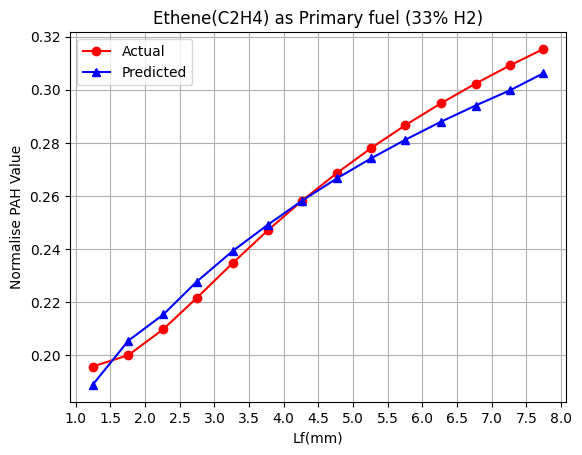

In [48]:
# Plotting Graphs for Ethene(C2H4) as Primary fuel (33% H2)
axes = plt.axes()
x = test_X['Lf(mm)'][84:98]
y_actual = test_X['PAH'][84:98]
y_pred = test_X['Pred_PAH'][84:98]

axes.set_title('Ethene(C2H4) as Primary fuel (33% H2)')
axes.set_ylabel('Normalise PAH Value')
axes.set_xlabel('Lf(mm)')
axes.set_xticks([1,1.5,2,2.5,3,3.5,4,4.5,5,5.5,6,6.5,7,7.5,8])
plt.plot(x,y_actual,'o-', color = 'red', label='Actual')
plt.plot(x,y_pred, '^-', color = 'blue', label='Predicted')
plt.legend(loc='best')
plt.grid()

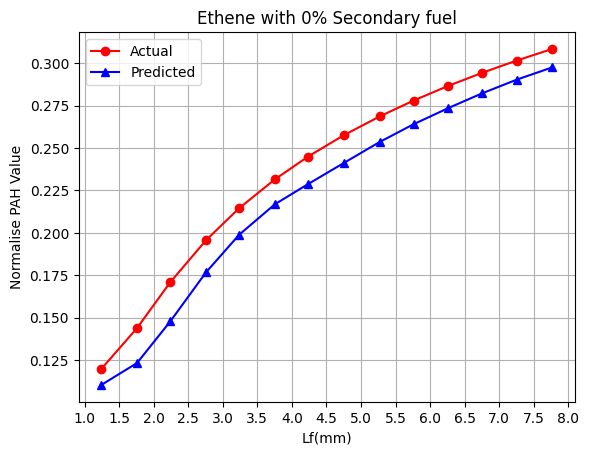

In [49]:
# Plotting Graphs for Ethene(C2H4) as Primary fuel (7% CH4)
axes = plt.axes()
x = test_X['Lf(mm)'][157:171]
y_actual = test_X['PAH'][157:171]
y_pred = test_X['Pred_PAH'][157:171]

axes.set_title('Ethene with 0% Secondary fuel')
axes.set_ylabel('Normalise PAH Value')
axes.set_xlabel('Lf(mm)')
axes.set_xticks([1,1.5,2,2.5,3,3.5,4,4.5,5,5.5,6,6.5,7,7.5,8])
plt.plot(x,y_actual,'o-', color = 'red', label='Actual')
plt.plot(x,y_pred, '^-', color = 'blue', label='Predicted')
plt.legend(loc='best')
plt.grid()

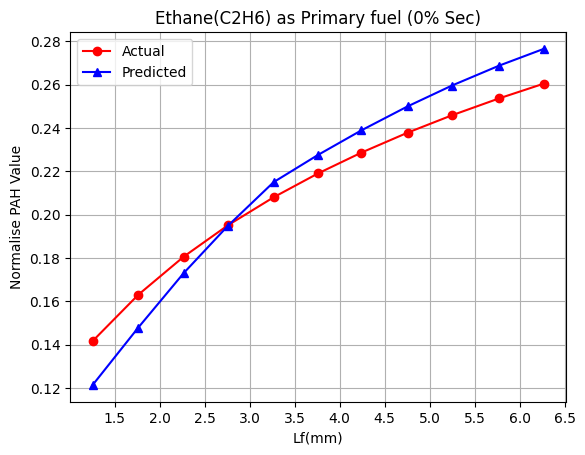

In [50]:
# Plotting Graphs for Ethane(C2H6) as Primary fuel (0% Sec)
axes = plt.axes()
x = test_X['Lf(mm)'][146:157]
y_actual = test_X['PAH'][146:157]
y_pred = test_X['Pred_PAH'][146:157]

axes.set_title('Ethane(C2H6) as Primary fuel (0% Sec)')
axes.set_ylabel('Normalise PAH Value')
axes.set_xlabel('Lf(mm)')
axes.set_xticks([1,1.5,2,2.5,3,3.5,4,4.5,5,5.5,6,6.5,7,7.5,8])
plt.plot(x,y_actual,'o-', color = 'red', label='Actual')
plt.plot(x,y_pred, '^-', color = 'blue', label='Predicted')
plt.legend(loc='best')
plt.grid()

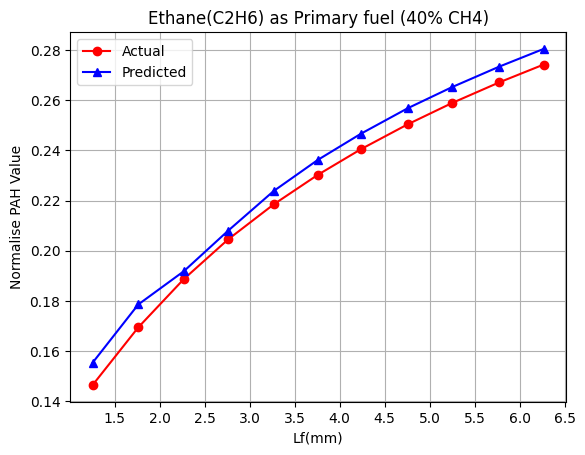

In [51]:
# Plotting Graphs for Ethane(C2H6) as Primary fuel (40% CH4)
axes = plt.axes()
x = test_X['Lf(mm)'][171:182]
y_actual = test_X['PAH'][171:182]
y_pred = test_X['Pred_PAH'][171:182]

axes.set_title('Ethane(C2H6) as Primary fuel (40% CH4)')
axes.set_ylabel('Normalise PAH Value')
axes.set_xlabel('Lf(mm)')
axes.set_xticks([1,1.5,2,2.5,3,3.5,4,4.5,5,5.5,6,6.5,7,7.5,8])
plt.plot(x,y_actual,'o-', color = 'red', label='Actual')
plt.plot(x,y_pred, '^-', color = 'blue', label='Predicted')
plt.legend(loc='best')
plt.grid()

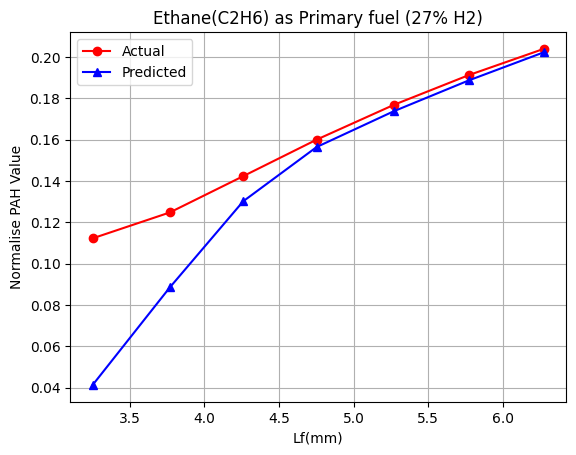

In [52]:
# Plotting Graphs for Ethane(C2H6) as Primary fuel (27% H2)
axes = plt.axes()
x = test_X['Lf(mm)'][182:189]
y_actual = test_X['PAH'][182:189]
y_pred = test_X['Pred_PAH'][182:189]

axes.set_title('Ethane(C2H6) as Primary fuel (27% H2)')
axes.set_ylabel('Normalise PAH Value')
axes.set_xlabel('Lf(mm)')
axes.set_xticks([1,1.5,2,2.5,3,3.5,4,4.5,5,5.5,6,6.5,7,7.5,8])
plt.plot(x,y_actual,'o-', color = 'red', label='Actual')
plt.plot(x,y_pred, '^-', color = 'blue', label='Predicted')
plt.legend(loc='best')
plt.grid()

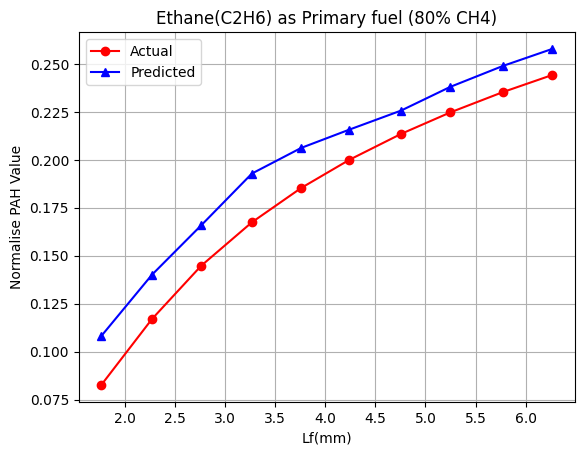

In [53]:
# Plotting Graphs for Ethane(C2H6) as Primary fuel (80% CH4)
axes = plt.axes()
x = test_X['Lf(mm)'][189:199]
y_actual = test_X['PAH'][189:199]
y_pred = test_X['Pred_PAH'][189:199]

axes.set_title('Ethane(C2H6) as Primary fuel (80% CH4)')
axes.set_ylabel('Normalise PAH Value')
axes.set_xlabel('Lf(mm)')
axes.set_xticks([1,1.5,2,2.5,3,3.5,4,4.5,5,5.5,6,6.5,7,7.5,8])
plt.plot(x,y_actual,'o-', color = 'red', label='Actual')
plt.plot(x,y_pred, '^-', color = 'blue', label='Predicted')
plt.legend(loc='best')
plt.grid()

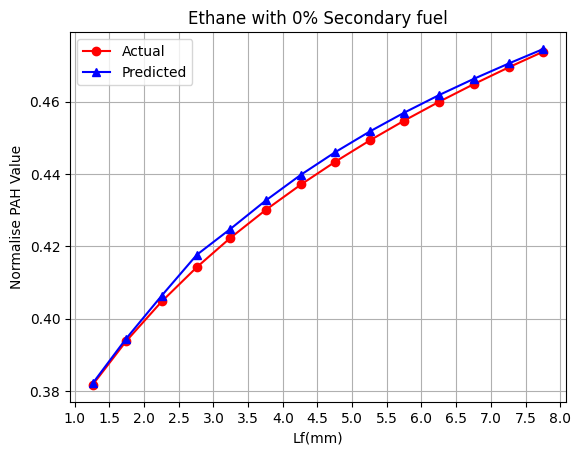

In [54]:
# Plotting Graphs for Propene(C3H6) as Primary fuel (10% H2)
axes = plt.axes()
x = test_X['Lf(mm)'][14:28]
y_actual = test_X['PAH'][14:28]
y_pred = test_X['Pred_PAH'][14:28]

axes.set_title('Ethane with 0% Secondary fuel')
axes.set_ylabel('Normalise PAH Value')
axes.set_xlabel('Lf(mm)')
axes.set_xticks([1,1.5,2,2.5,3,3.5,4,4.5,5,5.5,6,6.5,7,7.5,8])
plt.plot(x,y_actual,'o-', color = 'red', label='Actual')
plt.plot(x,y_pred, '^-', color = 'blue', label='Predicted')
plt.legend(loc='best')
plt.grid()

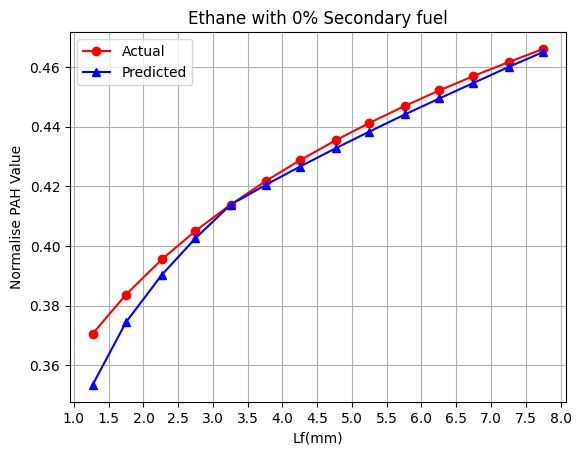

In [55]:
# Plotting Graphs for Propene(C3H6) as Primary fuel (30% CH4)
axes = plt.axes()
x = test_X['Lf(mm)'][42:56]
y_actual = test_X['PAH'][42:56]
y_pred = test_X['Pred_PAH'][42:56]

axes.set_title('Ethane with 0% Secondary fuel')
axes.set_ylabel('Normalise PAH Value')
axes.set_xlabel('Lf(mm)')
axes.set_xticks([1,1.5,2,2.5,3,3.5,4,4.5,5,5.5,6,6.5,7,7.5,8])
plt.plot(x,y_actual,'o-', color = 'red', label='Actual')
plt.plot(x,y_pred, '^-', color = 'blue', label='Predicted')
plt.legend(loc='best')
plt.grid()

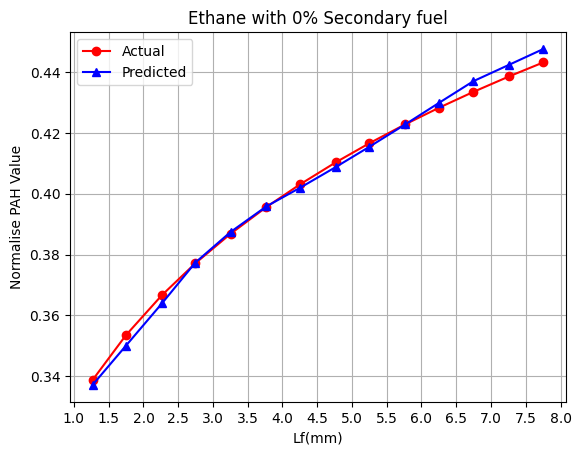

In [56]:
# Plotting Graphs for Propene(C3H6) as Primary fuel (45% CH4)
axes = plt.axes()
x = test_X['Lf(mm)'][56:70]
y_actual = test_X['PAH'][56:70]
y_pred = test_X['Pred_PAH'][56:70]

axes.set_title('Ethane with 0% Secondary fuel')
axes.set_ylabel('Normalise PAH Value')
axes.set_xlabel('Lf(mm)')
axes.set_xticks([1,1.5,2,2.5,3,3.5,4,4.5,5,5.5,6,6.5,7,7.5,8])
plt.plot(x,y_actual,'o-', color = 'red', label='Actual')
plt.plot(x,y_pred, '^-', color = 'blue', label='Predicted')
plt.legend(loc='best')
plt.grid()

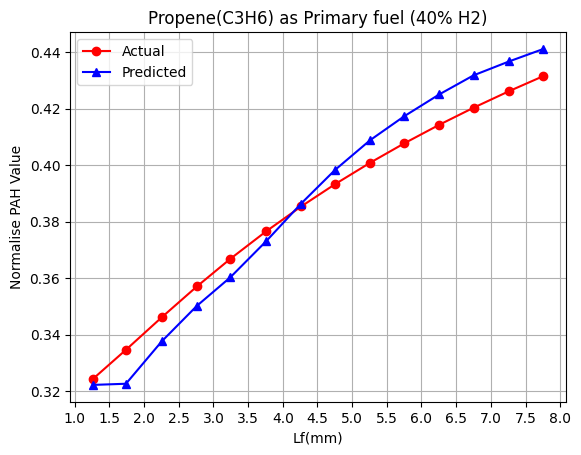

In [57]:
# Plotting Graphs for Propene(C3H6) as Primary fuel (40% H2)
axes = plt.axes()
x = test_X['Lf(mm)'][70:84]
y_actual = test_X['PAH'][70:84]
y_pred = test_X['Pred_PAH'][70:84]

axes.set_title('Propene(C3H6) as Primary fuel (40% H2)')
axes.set_ylabel('Normalise PAH Value')
axes.set_xlabel('Lf(mm)')
axes.set_xticks([1,1.5,2,2.5,3,3.5,4,4.5,5,5.5,6,6.5,7,7.5,8])
plt.plot(x,y_actual,'o-', color = 'red', label='Actual')
plt.plot(x,y_pred, '^-', color = 'blue', label='Predicted')
plt.legend(loc='best')
plt.grid()

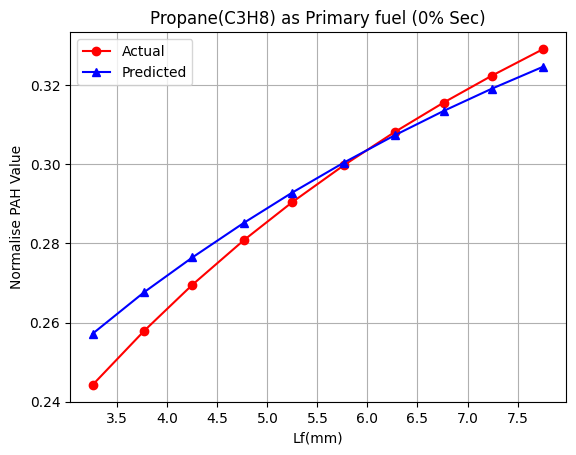

In [58]:
# Plotting Graphs for Propane(C3H8) as Primary fuel (0% Sec)
axes = plt.axes()
x = test_X['Lf(mm)'][98:108]
y_actual = test_X['PAH'][98:108]
y_pred = test_X['Pred_PAH'][98:108]

axes.set_title('Propane(C3H8) as Primary fuel (0% Sec)')
axes.set_ylabel('Normalise PAH Value')
axes.set_xlabel('Lf(mm)')
axes.set_xticks([1,1.5,2,2.5,3,3.5,4,4.5,5,5.5,6,6.5,7,7.5,8])
plt.plot(x,y_actual,'o-', color = 'red', label='Actual')
plt.plot(x,y_pred, '^-', color = 'blue', label='Predicted')
plt.legend(loc='best')
plt.grid()

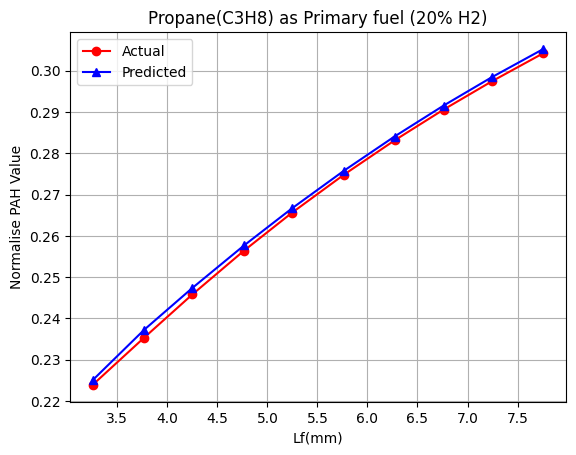

In [59]:
# Plotting Graphs for Propane(C3H8) as Primary fuel (20% H2)
axes = plt.axes()
x = test_X['Lf(mm)'][108:118]
y_actual = test_X['PAH'][108:118]
y_pred = test_X['Pred_PAH'][108:118]

axes.set_title('Propane(C3H8) as Primary fuel (20% H2)')
axes.set_ylabel('Normalise PAH Value')
axes.set_xlabel('Lf(mm)')
axes.set_xticks([1,1.5,2,2.5,3,3.5,4,4.5,5,5.5,6,6.5,7,7.5,8])
plt.plot(x,y_actual,'o-', color = 'red', label='Actual')
plt.plot(x,y_pred, '^-', color = 'blue', label='Predicted')
plt.legend(loc='best')
plt.grid()

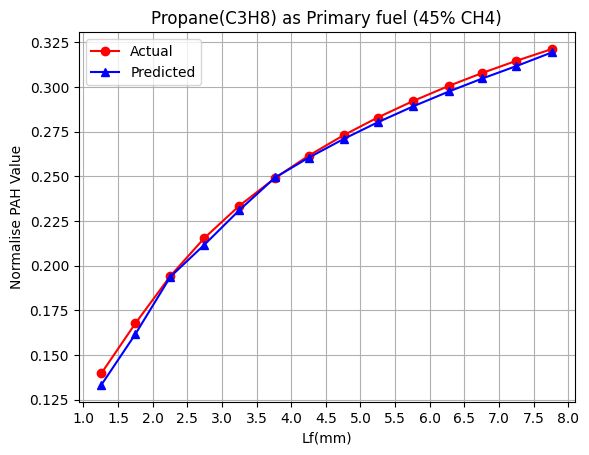

In [60]:
# Plotting Graphs for Propane(C3H8) as Primary fuel (45% CH4)
axes = plt.axes()
x = test_X['Lf(mm)'][118:132]
y_actual = test_X['PAH'][118:132]
y_pred = test_X['Pred_PAH'][118:132]

axes.set_title('Propane(C3H8) as Primary fuel (45% CH4)')
axes.set_ylabel('Normalise PAH Value')
axes.set_xlabel('Lf(mm)')
axes.set_xticks([1,1.5,2,2.5,3,3.5,4,4.5,5,5.5,6,6.5,7,7.5,8])
plt.plot(x,y_actual,'o-', color = 'red', label='Actual')
plt.plot(x,y_pred, '^-', color = 'blue', label='Predicted')
plt.legend(loc='best')
plt.grid()

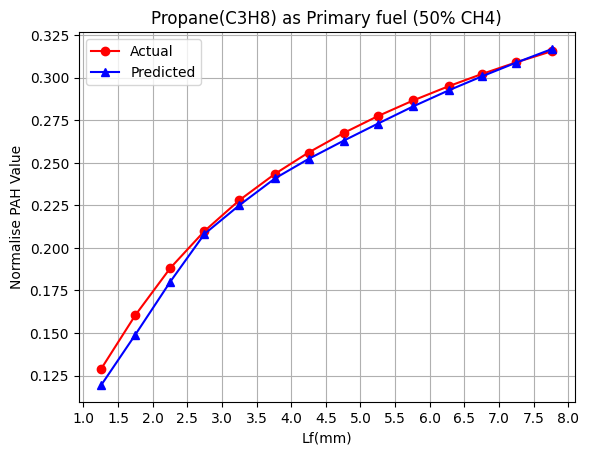

In [61]:
# Plotting Graphs for Propane(C3H8) as Primary fuel (50% CH4)
axes = plt.axes()
x = test_X['Lf(mm)'][132:146]
y_actual = test_X['PAH'][132:146]
y_pred = test_X['Pred_PAH'][132:146]

axes.set_title('Propane(C3H8) as Primary fuel (50% CH4)')
axes.set_ylabel('Normalise PAH Value')
axes.set_xlabel('Lf(mm)')
axes.set_xticks([1,1.5,2,2.5,3,3.5,4,4.5,5,5.5,6,6.5,7,7.5,8])
plt.plot(x,y_actual,'o-', color = 'red', label='Actual')
plt.plot(x,y_pred, '^-', color = 'blue', label='Predicted')
plt.legend(loc='best')
plt.grid()

In [62]:
#data_df = needed_df.copy()
#data_df[['Fuel', 'Mixture','Total_H_to_C']] = np.log10(data_df[['Fuel', 'Mixture','Total_H_to_C']])
#data_dfX = (data_df[['Lf(mm)', 'Fuel', 'Prim_MH_to_MC', 'Mixture', 'Sec_fuel_Percent','Total_H_to_C']])

In [63]:
Output_test_X = test_X.copy()
Output_test_X[['PAH','Pred_PAH']] = (Output_test_X[['PAH','Pred_PAH']])*10
Output_test_X[['Fuel', 'Mixture','Total_H_to_C','PAH','Pred_PAH']] = np.power(10,(Output_test_X[['Fuel', 'Mixture','Total_H_to_C','PAH','Pred_PAH']]))
Output_test_X[['Lf(mm)', 'Fuel', 'Prim_MH_to_MC', 'Mixture', 'Sec_fuel_Percent','Total_H_to_C','PAH','Pred_PAH']]

,Lf(mm),Fuel,Prim_MH_to_MC,Mixture,Sec_fuel_Percent,Total_H_to_C,PAH,Pred_PAH
S/No,,,,,,,,
442,1.243198,28.0,0.166667,2.0,0.00,2.00,655.583386,722.658630
443,1.759619,28.0,0.166667,2.0,0.00,2.00,884.130365,942.528870
444,2.265685,28.0,0.166667,2.0,0.00,2.00,1145.398219,1196.728882
445,2.746751,28.0,0.166667,2.0,0.00,2.00,1427.994004,1457.335083
446,3.263173,28.0,0.166667,2.0,0.00,2.00,1768.495113,1810.119995
...,...,...,...,...,...,...,...,...
654,5.763478,16.0,0.333333,2.0,0.07,4.14,13.355160,13.497066
655,6.275610,16.0,0.333333,2.0,0.07,4.14,17.107886,16.783493
656,6.752386,16.0,0.333333,2.0,0.07,4.14,21.247527,21.080715


In [64]:
# Exporting Results
Output_test_X.to_excel('Neural_PAH_Test_Results.xlsx')